# ***Importation and Data Reading***

In [1]:

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler,StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold,train_test_split,StratifiedKFold,cross_validate,GridSearchCV
from sklearn.svm import SVC


from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score,roc_curve
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import metrics

In [2]:
data = pd.read_csv('/content/X_rain.csv',header=None)
y_all = pd.read_csv('/content/y_train.csv',header=None)
#we will sample the data for a faster training
subset_size = 5000 #size of the subset
X, _, y, _ = train_test_split(data, y_all, train_size=subset_size, random_state=42)

In [3]:
X=X.reset_index(drop=True)
y=y.reset_index(drop=True)

# ***LogisticRegression + GridSearchCV***

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score, average='macro'),
    'roc_auc': make_scorer(roc_auc_score, multi_class='ovo', needs_proba=True),
}

pipe = Pipeline([
    ('normalization', StandardScaler()),
    ('regressor', LogisticRegression(max_iter=1000))
])

param_grid = {
    'regressor__solver': ['lbfgs'],
    'regressor__C': [0.1, 1],
}

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=1998)

grid_search = GridSearchCV(pipe, param_grid=param_grid, scoring=scoring, refit='accuracy', cv=cv, verbose=3)
grid_search.fit(X, np.array(y).ravel())

print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean cross-validation score: {:.2f}".format(grid_search.best_score_))

best_gbt = grid_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Fitting 4 folds for each of 2 candidates, totalling 8 fits
[CV 1/4] END regressor__C=0.1, regressor__solver=lbfgs; accuracy: (test=0.870) f1_score: (test=0.870) roc_auc: (test=0.974) total time=   9.9s
[CV 2/4] END regressor__C=0.1, regressor__solver=lbfgs; accuracy: (test=0.848) f1_score: (test=0.847) roc_auc: (test=0.974) total time=   6.8s
[CV 3/4] END regressor__C=0.1, regressor__solver=lbfgs; accuracy: (test=0.873) f1_score: (test=0.873) roc_auc: (test=0.976) total time=   8.8s
[CV 4/4] END regressor__C=0.1, regressor__solver=lbfgs; accuracy: (test=0.843) f1_score: (test=0.844) roc_auc: (test=0.967) total time=   4.6s
[CV 1/4] END regressor__C=1, regressor__solver=lbfgs; accuracy: (test=0.838) f1_score: (test=0.839) roc_auc: (test=0.967) total time=   8.1s
[CV 2/4] END regressor__C=1, regressor__solver=lbfgs; accuracy: (test=0.825) f1_score: (test=0.824) roc_auc: (test=0.965) total time=   5.8s
[CV 3/4] END regressor__C=1, regressor__solver=lbfgs; accuracy: (test=0.838) f1_score: 

In [ ]:
best_gbt

Pipeline(steps=[('normalization', StandardScaler()),
                ('regressor', LogisticRegression(C=0.1, max_iter=1000))])

# ***Gradient Boosting Classifier + GridSearchCV***

In [ ]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score, average='macro'),
    'roc_auc': make_scorer(roc_auc_score, multi_class='ovo', needs_proba=True),
}

clf=GradientBoostingClassifier(random_state=1998)
param_grid = {
    'n_estimators':[50],
    'max_depth':[2,3]}

cv=StratifiedKFold(n_splits=4,shuffle=True,random_state=1998)
grid_search = GridSearchCV(clf, param_grid=param_grid,scoring=scoring,refit='accuracy', cv=cv,verbose=3)
grid_search.fit(X, np.array(y).ravel())


print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean cross-validation score: {:.2f}".format(grid_search.best_score_))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Fitting 4 folds for each of 2 candidates, totalling 8 fits
[CV 1/4] END max_depth=2, n_estimators=50; accuracy: (test=0.875) f1_score: (test=0.876) roc_auc: (test=0.981) total time= 1.2min
[CV 2/4] END max_depth=2, n_estimators=50; accuracy: (test=0.855) f1_score: (test=0.855) roc_auc: (test=0.977) total time= 1.1min
[CV 3/4] END max_depth=2, n_estimators=50; accuracy: (test=0.870) f1_score: (test=0.870) roc_auc: (test=0.981) total time= 1.3min
[CV 4/4] END max_depth=2, n_estimators=50; accuracy: (test=0.858) f1_score: (test=0.858) roc_auc: (test=0.979) total time= 1.4min
[CV 1/4] END max_depth=3, n_estimators=50; accuracy: (test=0.894) f1_score: (test=0.894) roc_auc: (test=0.984) total time= 1.8min
[CV 2/4] END max_depth=3, n_estimators=50; accuracy: (test=0.872) f1_score: (test=0.872) roc_auc: (test=0.979) total time= 1.8min
[CV 3/4] END max_depth=3, n_estimators=50; accuracy: (test=0.886) f1_score: (test=0.886) roc_auc: (test=0.984) total time= 1.8min
[CV 4/4] END max_depth=3, n_est

In [ ]:
best_gbt = grid_search.best_estimator_
best_gbt

GradientBoostingClassifier(n_estimators=50, random_state=1998)

# ***KernelSVM + GridSearchCV***

In [ ]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score, average='macro'),
    'roc_auc': make_scorer(roc_auc_score, multi_class='ovo', needs_proba=True),
}
pipe = Pipeline([
    ('normalization', 'passthrough'),
    ('regressor', SVC(max_iter=10000,random_state=1998,probability=True))
])

param_grid = {
    'normalization': [StandardScaler()],
    'regressor__kernel': ['rbf','linear'],
    'regressor__C':[1]}
cv=StratifiedKFold(n_splits=4,shuffle=True,random_state=1998)
grid_search = GridSearchCV(pipe, param_grid=param_grid,scoring=scoring,refit='accuracy', cv=cv,verbose=3)
grid_search.fit(X, np.array(y).ravel())


print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean cross-validation score: {:.2f}".format(grid_search.best_score_))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


Fitting 4 folds for each of 2 candidates, totalling 8 fits
[CV 1/4] END normalization=StandardScaler(), regressor__C=1, regressor__kernel=rbf; accuracy: (test=0.886) f1_score: (test=0.886) roc_auc: (test=0.985) total time=  18.1s
[CV 2/4] END normalization=StandardScaler(), regressor__C=1, regressor__kernel=rbf; accuracy: (test=0.883) f1_score: (test=0.883) roc_auc: (test=0.982) total time=  18.8s
[CV 3/4] END normalization=StandardScaler(), regressor__C=1, regressor__kernel=rbf; accuracy: (test=0.890) f1_score: (test=0.890) roc_auc: (test=0.986) total time=  18.2s
[CV 4/4] END normalization=StandardScaler(), regressor__C=1, regressor__kernel=rbf; accuracy: (test=0.874) f1_score: (test=0.874) roc_auc: (test=0.982) total time=  17.9s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/4] END normalization=StandardScaler(), regressor__C=1, regressor__kernel=linear; accuracy: (test=0.836) f1_score: (test=0.836) roc_auc: (test=0.972) total time=  11.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/4] END normalization=StandardScaler(), regressor__C=1, regressor__kernel=linear; accuracy: (test=0.833) f1_score: (test=0.831) roc_auc: (test=0.968) total time=  10.3s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/4] END normalization=StandardScaler(), regressor__C=1, regressor__kernel=linear; accuracy: (test=0.830) f1_score: (test=0.829) roc_auc: (test=0.968) total time=   9.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/4] END normalization=StandardScaler(), regressor__C=1, regressor__kernel=linear; accuracy: (test=0.821) f1_score: (test=0.820) roc_auc: (test=0.964) total time=   9.2s
Best hyperparameters:  {'normalization': StandardScaler(), 'regressor__C': 1, 'regressor__kernel': 'rbf'}
Best mean cross-validation score: 0.88


In [ ]:
best_gbt = grid_search.best_estimator_
best_gbt

Pipeline(steps=[('normalization', StandardScaler()),
                ('regressor',
                 SVC(C=1, max_iter=10000, probability=True,
                     random_state=1998))])

# ***Ensembling - Voting Classifier***

In [ ]:
svc=SVC(max_iter=10000,random_state=1998,C= 1,kernel= 'rbf',probability=True)
lr=LogisticRegression(max_iter=1000,C=0.1,random_state=1998)
gb=GradientBoostingClassifier(n_estimators=50,max_depth=3,random_state=1998)


voting_clf = VotingClassifier(estimators=[('svc', svc),('gb',gb), ('lr', lr)], voting='soft',weights=[2,2,1])


pipe = Pipeline([
    ('normalization', StandardScaler()),
    ('regressor', voting_clf)
])
y=np.array(y)

kf=StratifiedKFold(n_splits=4,shuffle=True,random_state=1998)
score=[]
for i,(tr_idx,val_idx) in enumerate(kf.split(X,y.ravel())) :
    X_train,X_val=X.iloc[tr_idx],X.iloc[val_idx]
    y_train,y_val=y.ravel()[tr_idx],y.ravel()[val_idx]
    pipe.fit(X_train,y_train)
    score.append(pipe.score(X_val,y_val))
    print(score[-1])
    print('Fold Finished')

0.8952
Fold Finished
0.8816
Fold Finished
0.9056
Fold Finished
0.8848
Fold Finished


# ***Ensembling - Stacking Classifier***

**meta classifier: Logistic Regression**

In [ ]:
svc=SVC(max_iter=10000,random_state=1998,C= 1,kernel= 'rbf',probability=True)
lr=LogisticRegression(max_iter=1000,C=0.1,random_state=1998)
gb=GradientBoostingClassifier(n_estimators=50,max_depth=3,random_state=1998)



meta_model=LogisticRegression(C=0.1)
# Create a stacking classifier
stacking_clf = StackingClassifier(estimators=[('model1', svc), ('model2', lr)], final_estimator=meta_model)

pipe = Pipeline([
    ('normalization', StandardScaler()),
    ('regressor', stacking_clf)
])
y=np.array(y).ravel()

kf=StratifiedKFold(n_splits=4,shuffle=True,random_state=1998)
score=[]
for i,(tr_idx,val_idx) in enumerate(kf.split(X,y)) :
    X_train,X_val=X.iloc[tr_idx],X.iloc[val_idx]
    y_train,y_val=y[tr_idx],y[val_idx]
    pipe.fit(X_train,y_train)
    score.append(pipe.score(X_val,y_val))
    print(score[-1])
    print('Fold Finished')

0.8848
Fold Finished
0.8656
Fold Finished
0.8912
Fold Finished
0.8648
Fold Finished


**meta classifier : Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
svc=SVC(max_iter=10000,random_state=1998,C= 1,kernel= 'rbf',probability=True)
lr=LogisticRegression(max_iter=1000,C=0.1,random_state=1998)
gb=GradientBoostingClassifier(n_estimators=50,max_depth=3,random_state=1998)



meta_model=DecisionTreeClassifier(max_depth=3,random_state=1998)
# Create a stacking classifier
stacking_clf = StackingClassifier(estimators=[('model1', svc), ('model2', lr)], final_estimator=meta_model)

pipe = Pipeline([
    ('normalization', StandardScaler()),
    ('regressor', stacking_clf)
])
y=np.array(y)

kf=StratifiedKFold(n_splits=4,shuffle=True,random_state=1998)
score=[]
for i,(tr_idx,val_idx) in enumerate(kf.split(X,y)) :
    X_train,X_val=X.iloc[tr_idx],X.iloc[val_idx]
    y_train,y_val=y[tr_idx],y[val_idx]
    pipe.fit(X_train,y_train)
    score.append(pipe.score(X_val,y_val))
    print(score[-1])
    print('Fold Finished')

0.7472
Fold Finished
0.748
Fold Finished
0.7424
Fold Finished
0.7456
Fold Finished


# ***Ensembling - Bagging Classifier***

In [7]:
from sklearn.ensemble import BaggingClassifier
svc=SVC(max_iter=10000,random_state=1998,C= 1,kernel= 'rbf',probability=True)
bagging_clf = BaggingClassifier(
    estimator=svc,
    n_estimators=10,
    max_samples=0.8,
    random_state=1998
)

pipe_bagging = Pipeline([
    ('normalization', StandardScaler()),
    ('bagging', svc)
])
y=np.array(y).ravel()

bagging_scores = []
kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=1998)
for i, (tr_idx, val_idx) in enumerate(kf.split(X, y)):
    X_train, X_val = X.iloc[tr_idx], X.iloc[val_idx]
    y_train, y_val = y[tr_idx], y[val_idx]
    pipe_bagging.fit(X_train, y_train)
    bagging_scores.append(pipe_bagging.score(X_val, y_val))
    print(f"Fold {i+1} Bagging Accuracy: {bagging_scores[-1]:.4f}")

print(f"Mean Bagging Accuracy: {np.mean(bagging_scores):.4f}")

Fold 1 Bagging Accuracy: 0.8856
Fold 2 Bagging Accuracy: 0.8832
Fold 3 Bagging Accuracy: 0.8904
Fold 4 Bagging Accuracy: 0.8744
Mean Bagging Accuracy: 0.8834


Adaboost

In [10]:
from sklearn.tree import DecisionTreeClassifier

base_model = DecisionTreeClassifier(max_depth=1, random_state=1998)

adaboost_clf = AdaBoostClassifier(
    estimator=base_model,
    n_estimators=500,
    learning_rate=1.0,
    random_state=1998
)

pipe_adaboost = Pipeline([
    ('normalization', StandardScaler()),
    ('adaboost', adaboost_clf)
])

adaboost_scores = []
kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=1998)
for i, (tr_idx, val_idx) in enumerate(kf.split(X, y)):
    X_train, X_val = X.iloc[tr_idx], X.iloc[val_idx]
    y_train, y_val = y[tr_idx], y[val_idx]
    pipe_adaboost.fit(X_train, y_train)
    adaboost_scores.append(pipe_adaboost.score(X_val, y_val))
    print(f"Fold {i+1} AdaBoost Accuracy: {adaboost_scores[-1]:.4f}")

print(f"Mean AdaBoost Accuracy: {np.mean(adaboost_scores):.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Fold 1 AdaBoost Accuracy: 0.7240


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Fold 2 AdaBoost Accuracy: 0.7096


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Fold 3 AdaBoost Accuracy: 0.7096


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Fold 4 AdaBoost Accuracy: 0.7328
Mean AdaBoost Accuracy: 0.7190


meta data in stacking

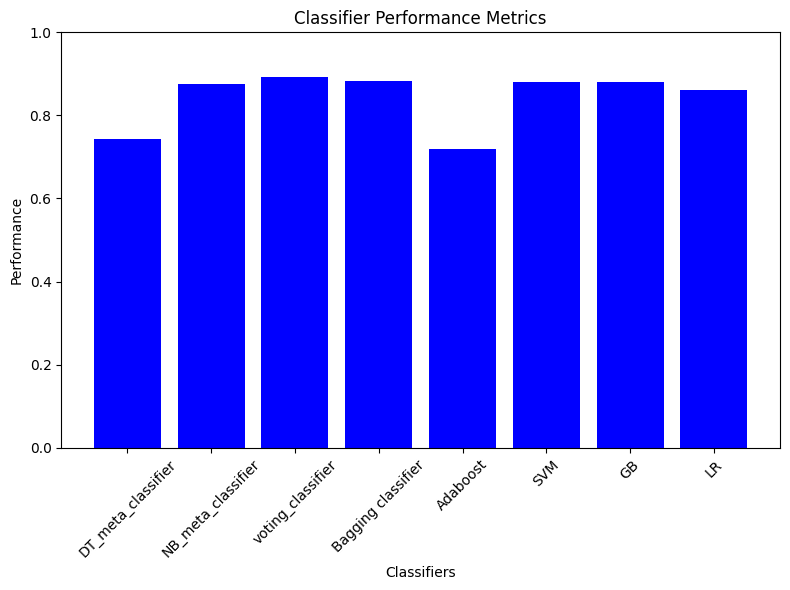

In [11]:
classifiers = ['DT_meta_classifier', 'NB_meta_classifier', 'voting_classifier','Bagging classifier','Adaboost', 'SVM', 'GB', 'LR']
performance = [0.743, 0.8766, 0.8918,0.8834,0.7190, 0.88,0.88, 0.86]

plt.figure(figsize=(8, 6))
plt.bar(classifiers, performance, color='blue')

plt.xlabel('Classifiers')
plt.ylabel('Performance')
plt.title('Classifier Performance Metrics')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


# ***Models Testing***

In [16]:
X_test = pd.read_csv('/content/X_test.csv',header=None)
y_test=pd.read_csv('/content/y_test.csv',header=None)

In [17]:
svc=SVC(max_iter=10000,random_state=1998,C= 1,kernel= 'rbf',probability=True)
lr=LogisticRegression(max_iter=1000,C=0.1,random_state=1998)
gb=GradientBoostingClassifier(n_estimators=50,max_depth=3,random_state=1998)

#Stacking GB
meta_model=LogisticRegression(C=0.1)
stacking_GB = StackingClassifier(estimators=[('model1', svc), ('model2', lr)], final_estimator=meta_model)

stacking_GB_pipe = Pipeline([
    ('normalization', StandardScaler()),
    ('regressor', stacking_GB)
])

#voting
voting_clf = VotingClassifier(estimators=[('svc', svc),('gb',gb), ('lr', lr)], voting='soft',weights=[2,2,1])


voting_pipe = Pipeline([
    ('normalization', StandardScaler()),
    ('regressor', voting_clf)
])

#bagging
bagging_clf = BaggingClassifier(
    estimator=svc,
    n_estimators=10,
    max_samples=0.8,
    random_state=1998
)

pipe_bagging = Pipeline([
    ('normalization', StandardScaler()),
    ('bagging', svc)
])


In [18]:
svc.fit(X,y)
svm_preds=svc.predict(X_test)

lr.fit(X,y)
lr_preds=lr.predict(X_test)

gb.fit(X,y)
gb_preds=gb.predict(X_test)

stacking_GB_pipe.fit(X,y)
stck_gb=stacking_GB_pipe.predict(X_test)

pipe_bagging.fit(X,y)
baggign_preds=pipe_bagging.predict(X_test)

voting_pipe.fit(X,y)
vt_preds=voting_pipe.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


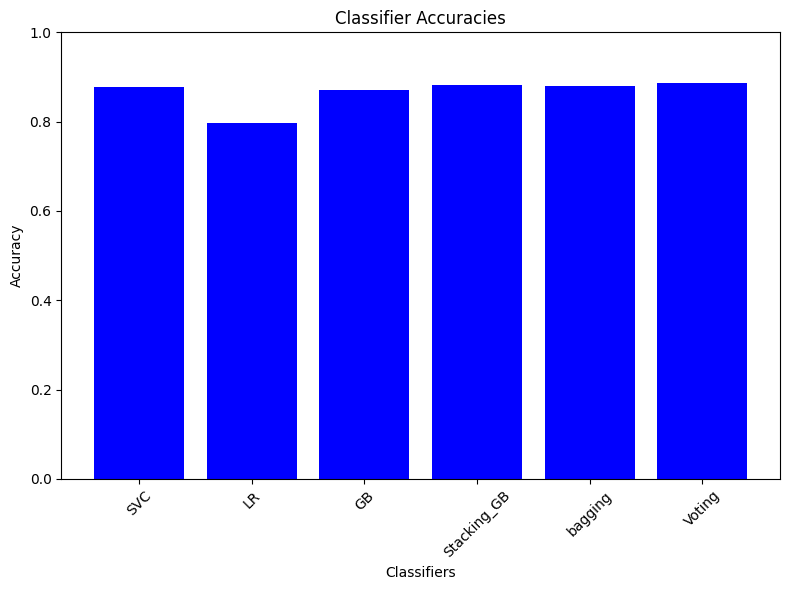

In [19]:
accuracies = {
    'SVC': accuracy_score(y_test, svm_preds),
    'LR': accuracy_score(y_test, lr_preds),
    'GB': accuracy_score(y_test, gb_preds),
    'Stacking_GB': accuracy_score(y_test, stck_gb),
    'bagging': accuracy_score(y_test, baggign_preds),
    'Voting': accuracy_score(y_test, vt_preds)
}

plt.figure(figsize=(8, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='blue')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracies')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
accuracies

{'SVC': 0.8786,
 'LR': 0.7976,
 'GB': 0.8712,
 'Stacking_GB': 0.8828,
 'bagging': 0.8796,
 'Voting': 0.8858}

In [21]:
label_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

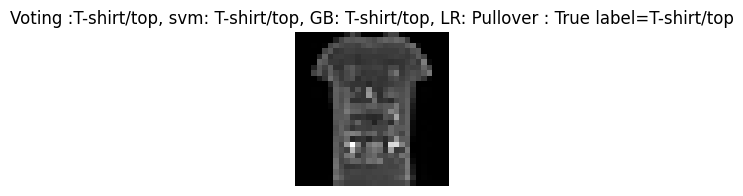

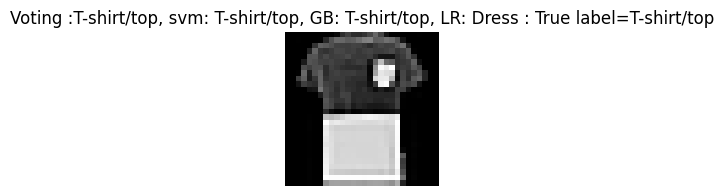

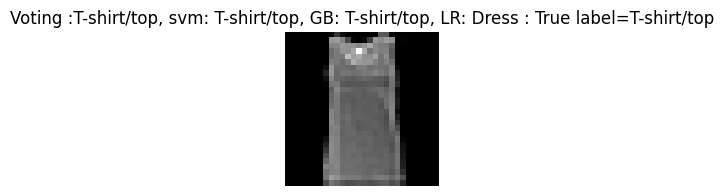

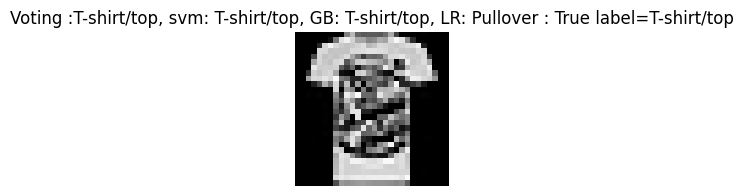

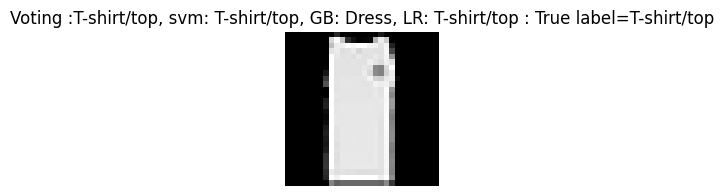

In [23]:
y_test=np.array(y_test).ravel()
voting_correct = vt_preds == y_test
other_incorrect = ((gb_preds != y_test) | (svm_preds != y_test) | (lr_preds != y_test)) & voting_correct

incorrect_samples = np.array(X_test[other_incorrect])
true_labels=np.array(y_test[other_incorrect])
vot_=np.array(vt_preds[other_incorrect])
svm_=np.array(svm_preds[other_incorrect])
lr_=np.array(lr_preds[other_incorrect])
gb_=np.array(gb_preds[other_incorrect])
for i in range(min(5, len(incorrect_samples))):
    plt.figure(figsize=(2, 2))
    plt.imshow(incorrect_samples[i].reshape(28, 28), cmap='gray')
    plt.title(f'Voting :{label_dict[vot_[i]]}, svm: {label_dict[svm_[i]]}, GB: {label_dict[gb_[i]]}, LR: {label_dict[lr_[i]]} : True label={label_dict[true_labels[i]]}')
    plt.axis('off')
    plt.show()

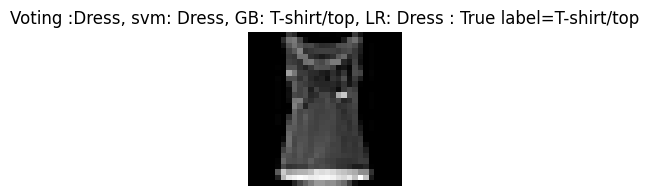

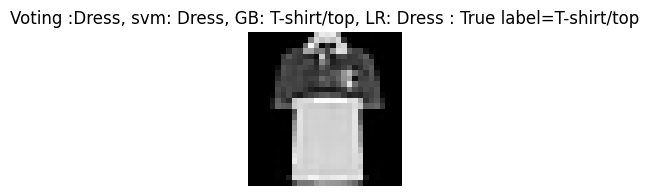

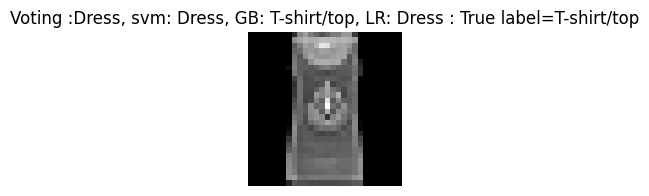

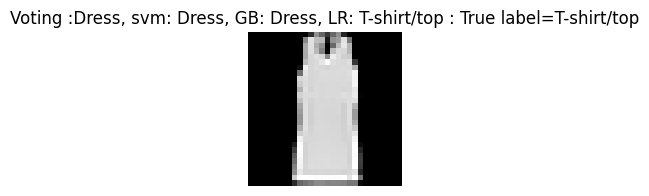

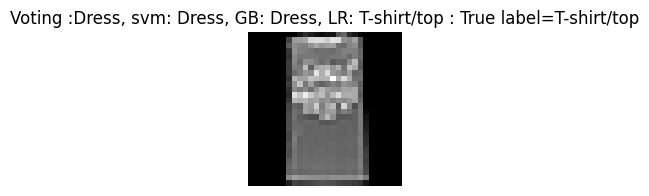

In [24]:
voting_correct = vt_preds != y_test
other_incorrect = ((gb_preds == y_test) | (svm_preds == y_test) | (lr_preds == y_test)) & voting_correct

incorrect_samples = np.array(X_test[other_incorrect])
true_labels=np.array(y_test[other_incorrect])
vot_=np.array(vt_preds[other_incorrect])
svm_=np.array(svm_preds[other_incorrect])
lr_=np.array(lr_preds[other_incorrect])
gb_=np.array(gb_preds[other_incorrect])
for i in range(min(5, len(incorrect_samples))):
    plt.figure(figsize=(2, 2))
    plt.imshow(incorrect_samples[i].reshape(28, 28), cmap='gray')
    plt.title(f'Voting :{label_dict[vot_[i]]}, svm: {label_dict[svm_[i]]}, GB: {label_dict[gb_[i]]}, LR: {label_dict[lr_[i]]} : True label={label_dict[true_labels[i]]}')
    plt.axis('off')
    plt.show()